In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Aplanamiento de la dimensión

In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [6]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

### Condición de la clasificación
Si las entradas son **par** o **impar**

In [11]:
y_train = (y_train%2 == 0).astype(int)
y_test = (y_test%2 == 0).astype(int)

In [12]:
y_train[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
dimension_entrada = X_train.shape[1]    # Las 784 entradas
dimension_salida = 1    # Capa de salida binaria (o 0 o 1)
modelo = Sequential()
modelo.add(Dense(20, input_dim = dimension_entrada, activation="relu"))
modelo.add(Dense(1, activation="sigmoid"))
sgd = SGD(learning_rate=0.1)

# En clasificación se suele añadir un parámetro más, las métricas.
modelo.compile(loss="binary_crossentropy", optimizer=sgd,
               metrics=["accuracy"])

modelo.summary()

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,721 (61.41 KB)

 Trainable params: 15,721 (61.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 10
batch_size = 20
historia = modelo.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 736us/step - accuracy: 0.9822 - loss: 0.0609
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.9933 - loss: 0.0233
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.9956 - loss: 0.0155
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.9966 - loss: 0.0107
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.9979 - loss: 0.0077
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.9981 - loss: 0.0069
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - accuracy: 0.9983 - loss: 0.0059
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.9985 - loss: 0.0049
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step - accuracy: 0.9990 - loss: 0.0034
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.9991 - loss: 0.0036


<Axes: >

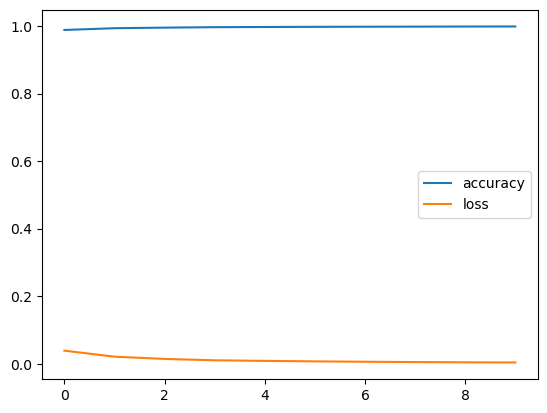

In [18]:
pd.DataFrame(historia.history).plot()

> Predicciones

In [19]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[9.9999958e-01],
       [9.9999535e-01],
       [9.9999791e-01],
       [1.4998493e-04],
       [9.9997568e-01],
       [9.9999738e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)>

> Valores reales

In [20]:
y_test[0:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])